In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

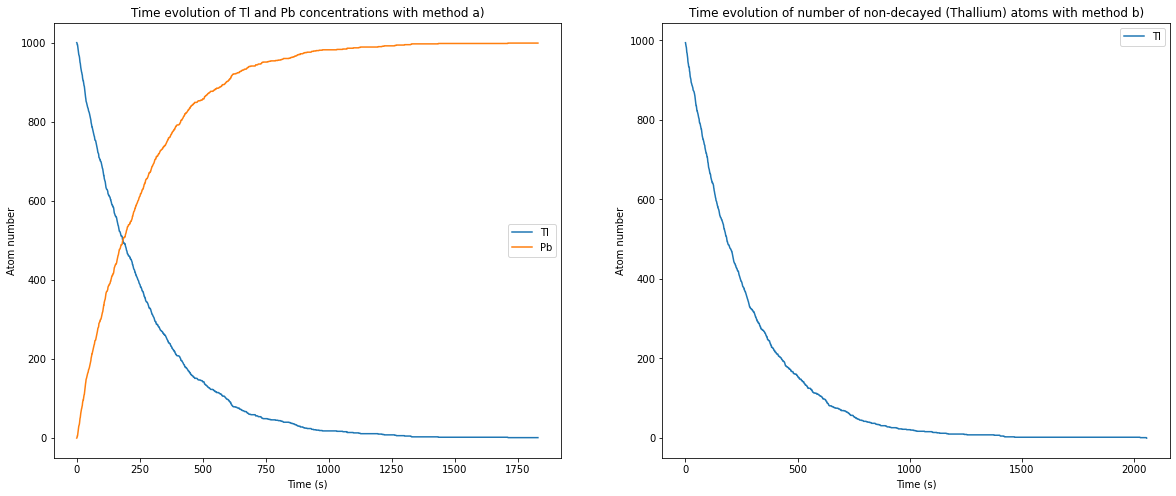

In [2]:
t_half = 3.052 * 60 # half-life in seconds
dt = 1 # time step in seconds
Ni = 1000 # initial number of Thallium atoms
Nts = int(10*t_half) # total number of time steps



# a) computing decaying at each time step
Tl_t = [Ni]
Pb_t = [0]

# probability for a single atom to decay in a time dt
p_decay_dt = 1 - 2**(-dt/t_half) 

for i in range(1,Nts):
    x = Tl_t[-1]
    if x<=0: break
    
    # count the number of decayed atoms at this step
    # and update the Thallium and Lead quantities
    dx = np.sum(npr.random(size=x) < p_decay_dt)
    Tl_t.append(x - dx)
    Pb_t.append(Pb_t[-1] + dx)

# plots
fig, axs = plt.subplots(1,2, figsize=(20,8))
axs[0].plot(Tl_t, label='Tl')
axs[0].plot(Pb_t, label='Pb')
axs[0].set_title("Time evolution of Tl and Pb concentrations with method a)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Atom number")
axs[0].legend()



# b) using the inverse transformation method

# draw Ni points from the exponential distribution
exp_dist = stats.expon(loc=0, scale=t_half/np.log(2))
decay_times = exp_dist.rvs(size=Ni)

# for each time step count the number of non decayed samples (using numpy broadcasting)
t_max = int(np.ceil(decay_times.max()/dt))*dt
t = np.reshape(np.arange(1,t_max+1)*dt, (t_max,1))
Tl_t2 = np.sum(decay_times>t, axis=1)

# plots
axs[1].plot(Tl_t2, label='Tl')
axs[1].set_title("Time evolution of number of non-decayed (Thallium) atoms with method b)")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Atom number")
axs[1].legend()

plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

### Personal Notes:
The PDF of $b(x,y)=\sqrt{x^2+y^2}$ is
$$
f(x,y) = \frac{1}{2\pi\sigma^2}\, \exp{\left(-\frac{x^2+y^2}{2 \sigma^2} \right)} = \frac{1}{2\pi\, (a_0/100)^2}\, \exp{\left(-\frac{(b\,(x,y))^2}{2\, (a_0/100)^2} \right)}
$$

In the following we will first focus on the scaled (dimensionless) variable $z\equiv \dfrac{b}{\sigma} = \dfrac{b}{(a_0/100)}$ and only after having drawn the dimensionless variable $z=\sqrt{z_1^2 + z_2^2}$, we rescale it back to b. The scaled PDF will thus be
$$
\tilde{f} (z_1,z_2) = \frac{1}{2\pi}\, \exp{\left(-\frac{z_1^2 + z_2^2}{2} \right)}
$$

The scattering angle in terms of this new variable is defined as
$$
\tan{\frac{\theta}{2}} = \frac{Z e^2} {2\pi \epsilon_0 E} \frac{1}{\sigma z} = \frac{Z e^2} {2\pi \epsilon_0 E} \frac{100}{a_0}\frac{1}{z} \equiv \alpha \frac{1}{z}
$$
with $\alpha \simeq 0.055836$ for the values of our problem.

The particles that bounces back are those that have $\theta \geq \dfrac{\pi}{2} \Longrightarrow \alpha \dfrac{1}{z} = \tan{\dfrac{\theta}{2}} \geq \tan{\dfrac{\pi}{4}}=1 \Longrightarrow \boldsymbol{z \leq \alpha}$

Fraction of particles that bounce back is 1.53e-03


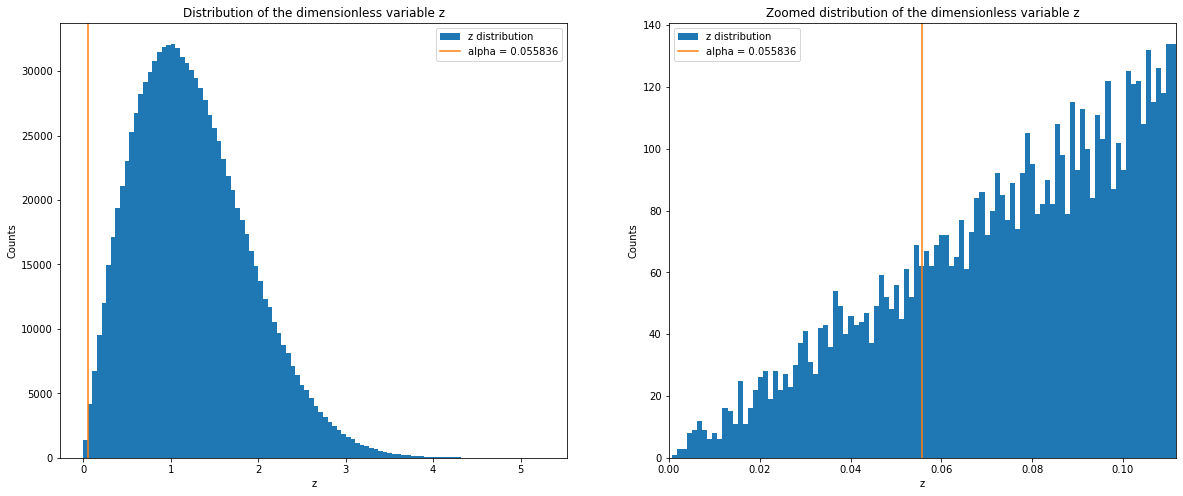

In [3]:
N = 10**6
alpha = 0.055836

# generate the normal-2D random variable z (dimensionless version of the b parameter)
gauss2D_distr = stats.multivariate_normal(mean=[0,0],cov=1)
z = np.sqrt(np.sum(np.power(gauss2D_distr.rvs(N), 2),axis=1))

# plot an histogram of the z distribution
fig, axs = plt.subplots(1,2, figsize=(20,8))
axs[0].hist(z, bins=100, label='z distribution')
axs[0].axvline(alpha, c='C1', label='alpha = '+str(alpha))
axs[0].set_title("Distribution of the dimensionless variable z")
axs[0].set_xlabel("z")
axs[0].set_ylabel("Counts")
axs[0].legend()

# plot a zoomed histogram around z
axs[1].hist(z[z<=2*alpha], bins=100, label='z distribution')
axs[1].axvline(alpha, c='C1', label='alpha = '+str(alpha))
axs[1].set_title("Zoomed distribution of the dimensionless variable z")
axs[1].set_xlabel("z")
axs[1].set_ylabel("Counts")
axs[1].set_xlim((0, 2*alpha))
axs[1].legend()

# compute the fraction of particles that bounce back
x = np.sum(z<=alpha)/N
print("Fraction of particles that bounce back is %2.2e" % x)

The fraction of particles that bounce back is **x = 0.151%**

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [4]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

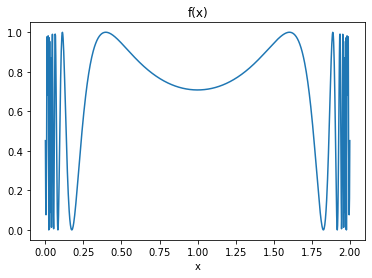

The true value of the integral is approximately 
	I_true = 1.45140 

1) Integration by hit/miss method:
	Integral value I1 = 1.45164
	Relative error e1 = 1.64334e-04 

2) Integration by mean value method:
	Integral value I2 = 1.45457
	Relative error e2 = 2.17978e-03 



In [5]:
# plot function
xs = np.linspace(0.001,1.999,1000)
plt.plot(xs,f(xs))
plt.title("f(x)")
plt.xlabel("x")
plt.show()

N = 100000
I_true = 1.451401485390652 # according to Mathematica
print("The true value of the integral is approximately \n\tI_true = %2.5f \n" % I_true)

# hit/miss integration
x = 2*npr.random(N)
y = npr.random(N)
I1 = 2*np.sum(y<f(x))/N
e1 = np.abs(I1-I_true)/I_true
print("1) Integration by hit/miss method:")
print("\tIntegral value I1 = %2.5f" % I1)
print("\tRelative error e1 = %2.5e \n" % e1)

# mean value integration
x = 2*npr.random(N)
y = f(x)
I2 = 2*np.sum(y)/N
e2 = np.abs(I2-I_true)/I_true
print("2) Integration by mean value method:")
print("\tIntegral value I2 = %2.5f" % I2)
print("\tRelative error e2 = %2.5e \n" % e2)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
# integrate hypersphere over the domain [-1,1]^D
def Dsphere_volume (D=2, N=10**6):
    x = 2*npr.random(size=(N,D)) - 1
    
    # radius of each sample
    r = np.sum(np.power(x,2), axis=1)
    
    # volume
    V = (2**D)*np.sum(r<=1)/N
    return V

In [7]:
# compute the D-dimensional volume of spheres
# with D from 2 to 10
df = pd.DataFrame.from_dict([{'D':d, 'V':Dsphere_volume(D=d)} for d in range(2,11)])
df.set_index('D', inplace=True)
print("\nVolumes of hyperspheres are"); display(df)


Volumes of hyperspheres are


,V
D,
2,3.139096
3,4.188368
4,4.927872
5,5.243680
6,5.165632
7,4.748288
8,4.102400
9,3.333120
10,2.525184


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [8]:
N = 100000
I_true = 0.8389329600 # according to Mathematica

# define the importance function and draw samples from it
w = stats.powerlaw(0.5)
x = w.rvs(N)

# compute integral and relative error
I = (1.0/N) * np.sum((np.power(x,-0.5)/(np.exp(x)+1))/w.pdf(x))
err = np.abs(I - I_true)/I_true

print("The true value of the integral is approximately \n\tI_true = %2.5f \n" % I_true)
print("Integration by importance sampling method:")
print("\tIntegral value I = %2.5f" % I)
print("\tRelative error err = %2.5e \n" % err)

The true value of the integral is approximately 
	I_true = 0.83893 

Integration by importance sampling method:
	Integral value I = 0.83827
	Relative error err = 7.84571e-04 

